# Final Graphs for Report

## General Imports and Stuff

In [1]:
import monke_features as mf
import monke_io as mio
import monke_classify as mc
import dim_reduction as dr

import os.path as path
from pathlib import Path

import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [39]:
# KOI
names_koi = ["koi_apr11", "koi_apr17", "koi_apr25", "koi_apr25_3", "koi_apr25_4", "koi_apr25_5", "koi_apr25_6"]

pose_data_koi = mio.read_poses(names_koi)
tremors_raw = mio.read_tremors_multi(names_koi)
labels_koi = {}

for name in tremors_raw:
    labels_koi[name] = mf.generate_labelled_frames(pose_data_koi[name], tremors_raw[name])

# BOBA
names_boba = ["boba_apr11", "boba_apr21", "boba_apr21_2", "boba_apr25", "boba_apr25_2"]

pose_data_boba = mio.read_poses(names_boba)
tremors_raw = mio.read_tremors_multi(names_boba)
labels_boba = {}

for name in tremors_raw:
    labels_boba[name] = mf.generate_labelled_frames(pose_data_boba[name], tremors_raw[name])

# BANDUNG
names_bandung = ["bandung_mar27", "bandung_mar27_2", "bandung_mar27_3", "bandung_may19_2"]

pose_data_bandung = mio.read_poses(names_bandung)
tremors_raw = mio.read_tremors_multi(names_bandung)
labels_bandung = {}

for name in tremors_raw:
    labels_bandung[name] = mf.generate_labelled_frames(pose_data_bandung[name], tremors_raw[name])

# HORLICKS
names_horlicks = ["horlicks_apr12", "horlicks_may2", "horlicks_jun16"]

pose_data_horlicks = mio.read_poses(names_horlicks)
tremors_raw = mio.read_tremors_multi(names_horlicks)
labels_horlicks = {}

for name in tremors_raw:
    labels_horlicks[name] = mf.generate_labelled_frames(pose_data_horlicks[name], tremors_raw[name])
    
# BRIYANI
names_briyani = ["briyani_apr12", "briyani_may19", "briyani_jun16"]

pose_data_briyani = mio.read_poses(names_briyani)
tremors_raw = mio.read_tremors_multi(names_briyani)
labels_briyani = {}

for name in tremors_raw:
    labels_briyani[name] = mf.generate_labelled_frames(pose_data_briyani[name], tremors_raw[name])
    
# TUTU KUEH
names_tutukueh = ["tutukueh_apr21", "tutukueh_may2", "tutukueh_jun15"]

pose_data_tutukueh = mio.read_poses(names_tutukueh)
tremors_raw = mio.read_tremors_multi(names_tutukueh)
labels_tutukueh = {}

for name in tremors_raw:
    labels_tutukueh[name] = mf.generate_labelled_frames(pose_data_tutukueh[name], tremors_raw[name])

# ALL
names_all = {"koi":names_koi, "boba":names_boba, "bandung":names_bandung, 
             "horlicks":names_horlicks, "briyani":names_briyani, "tutukueh":names_tutukueh}
pose_data_all = {"koi":pose_data_koi, "boba":pose_data_boba, "bandung":pose_data_bandung, 
             "horlicks":pose_data_horlicks, "briyani":pose_data_briyani, "tutukueh":pose_data_tutukueh}
labels_all = {"koi":labels_koi, "boba":labels_boba, "bandung":labels_bandung, 
             "horlicks":labels_horlicks, "briyani":labels_briyani, "tutukueh":labels_tutukueh}

In [2]:
cd = Path(path.abspath(""))

## UMAP Graph

In [63]:
ws = 10
t = 0.1

process = lambda x : mf.changes_in_changes(mf.vel(x), window_size=ws, threshold=t)
pose_boba_apr11 = mio.read_pose("boba_apr11")
data_boba_apr11 = process(pose_boba_apr11)
tremors_boba_apr11 = mio.read_tremors("boba_apr11")
labels_boba_apr11 = mf.generate_labelled_frames(data_boba_apr11, tremors_boba_apr11)

In [64]:
reduced, reducer = dr.umap_reduce(data_boba_apr11)

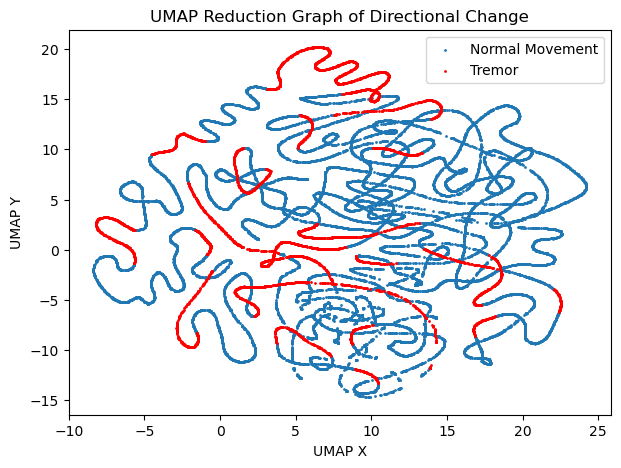

In [65]:
labels = np.array(labels_boba_apr11)
normal_points = reduced[labels == 0]
tremor_points = reduced[labels == 1]

plt.scatter(normal_points[:, 0], normal_points[:, 1], c="tab:blue", s=1, label="Normal Movement")
plt.scatter(tremor_points[:, 0], tremor_points[:, 1], c="red", s=1, label="Tremor")

plt.xlabel("UMAP X")
plt.ylabel("UMAP Y")
plt.title("UMAP Reduction Graph of Directional Change")
plt.legend()

plt.gcf().set_size_inches((7, 5))
# plt.xlim((-1.8, 15.5))
# plt.ylim((-3, 13))

plt.savefig(path.join(cd, "final_report_graphs", f"umap_{ws}.png"), dpi=300)

plt.show()

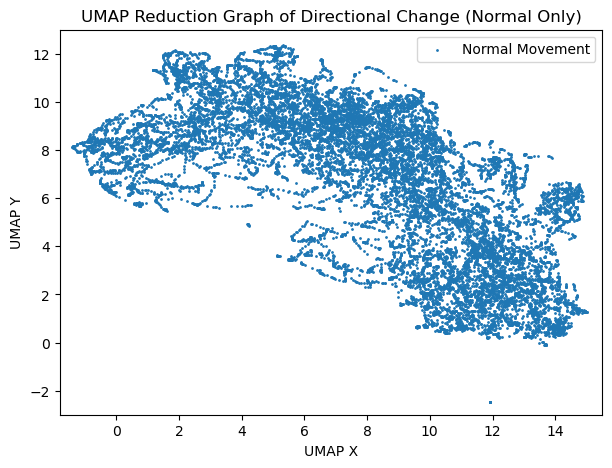

In [36]:
plt.scatter(normal_points[:, 0], normal_points[:, 1], c="tab:blue", s=1, label="Normal Movement")

plt.xlabel("UMAP X")
plt.ylabel("UMAP Y")
plt.title("UMAP Reduction Graph of Directional Change (Normal Only)")
plt.legend()
plt.gcf().set_size_inches((7, 5))
plt.xlim((-1.8, 15.5))
plt.ylim((-3, 13))

plt.savefig(path.join(cd, "final_report_graphs", "umap_normal.png"), dpi=300)

plt.show()

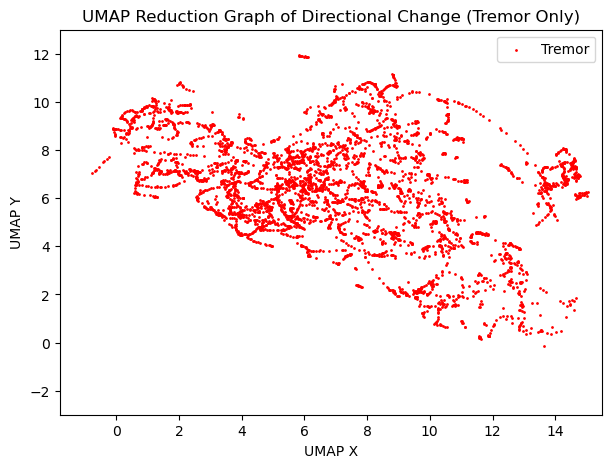

In [37]:
plt.scatter(tremor_points[:, 0], tremor_points[:, 1], c="red", s=1, label="Tremor")

plt.xlabel("UMAP X")
plt.ylabel("UMAP Y")
plt.title("UMAP Reduction Graph of Directional Change (Tremor Only)")
plt.legend()
plt.gcf().set_size_inches((7, 5))
plt.xlim((-1.8, 15.5))
plt.ylim((-3, 13))

plt.savefig(path.join(cd, "final_report_graphs", "umap_tremor.png"), dpi=300)

plt.show()

## Window Size Graph

In [76]:
t = 0.1
window_sizes = list(range(1,21))
mccs = []

for ws in window_sizes:
    process = lambda x : mf.changes_in_changes(mf.vel(x), ws, t)
    pro_data, pro_labels = mc.process_data(pose_data_koi, labels_koi, process)
    training_data, testing_data, training_labels, testing_labels = mc.prep_train_test_data(pro_data, pro_labels, names_koi)
    
    clf = RandomForestClassifier(class_weight="balanced")
    clf.fit(training_data, training_labels)

    testing_data_merged = np.concatenate([testing_data[name] for name in testing_data])
    testing_labels_merged = np.concatenate([testing_labels[name] for name in testing_labels])

    mccs.append(mc.test_classify(clf, testing_data_merged, testing_labels_merged)["mcc"])

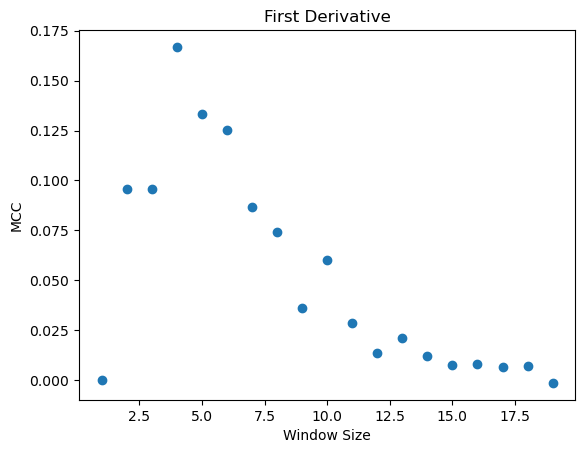

In [77]:
plt.scatter(window_sizes[:-1], np.diff(mccs, 1))
plt.title("First Derivative")
plt.xlabel("Window Size")
plt.ylabel("MCC")
plt.show()

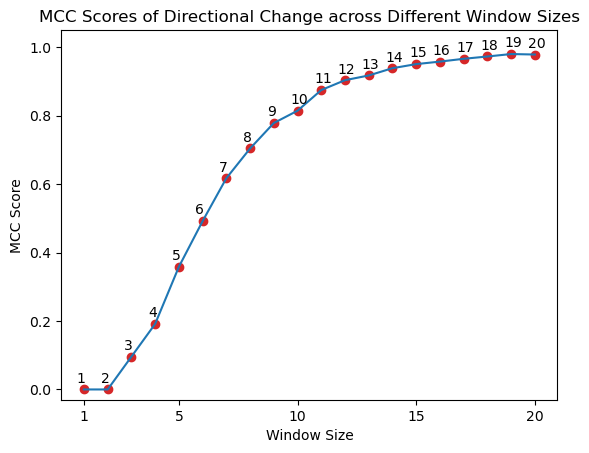

In [86]:
plt.plot(window_sizes, mccs)
plt.scatter(window_sizes, mccs, c="tab:red")
plt.title("MCC Scores of Directional Change across Different Window Sizes")

for w in window_sizes:
    plt.text(w-0.3, mccs[w-1]+0.02, str(w))

plt.xlabel("Window Size")
plt.ylabel("MCC Score")
plt.xticks([1] + [i for i in window_sizes if i%5==0])
plt.ylim(-0.03, 1.05)
# plt.gcf().set_size_inches((7, 7))
plt.savefig(path.join(cd, "final_report_graphs", "window_size.png"), dpi=300)
plt.show()

## [IGNORE] Threshold Graph

In [ ]:
thresholds = [0.01*i for i in range()]
window_sizes = list(range(1,21))
mccs = []

for ws in window_sizes:
    process = lambda x : mf.changes_in_changes(mf.vel(x), ws, t)
    pro_data, pro_labels = mc.process_data(pose_data_koi, labels_koi, process)
    training_data, testing_data, training_labels, testing_labels = mc.prep_train_test_data(pro_data, pro_labels, names_koi)
    
    clf = RandomForestClassifier(class_weight="balanced")
    clf.fit(training_data, training_labels)

    testing_data_merged = np.concatenate([testing_data[name] for name in testing_data])
    testing_labels_merged = np.concatenate([testing_labels[name] for name in testing_labels])

    mccs.append(mc.test_classify(clf, testing_data_merged, testing_labels_merged)["mcc"])

## Noise Reduction Matrix (Final)

In [83]:
thresholds = [0.25, 0.3]

results_final = {}

for t in thresholds:
    process = lambda x : mf.changes_in_changes(mf.vel(x), 5, t)
    pro_data, pro_labels = mc.process_data(pose_data_koi, labels_koi, process)
    training_data, testing_data, training_labels, testing_labels = mc.prep_train_test_data(pro_data, pro_labels, names_koi)
    clf = RandomForestClassifier(class_weight="balanced")
    clf.fit(training_data, training_labels)

    testing_data_merged = np.concatenate([testing_data[name] for name in testing_data])
    testing_labels_merged = np.concatenate([testing_labels[name] for name in testing_labels])

    results_final[t] = mc.test_classify(clf, testing_data_merged, testing_labels_merged)

In [86]:
for t in results_final:
    print(f"{t}: {results_final[t]['mcc']}")

0.25: 0.342858114442283
0.3: 0.32913028335029876


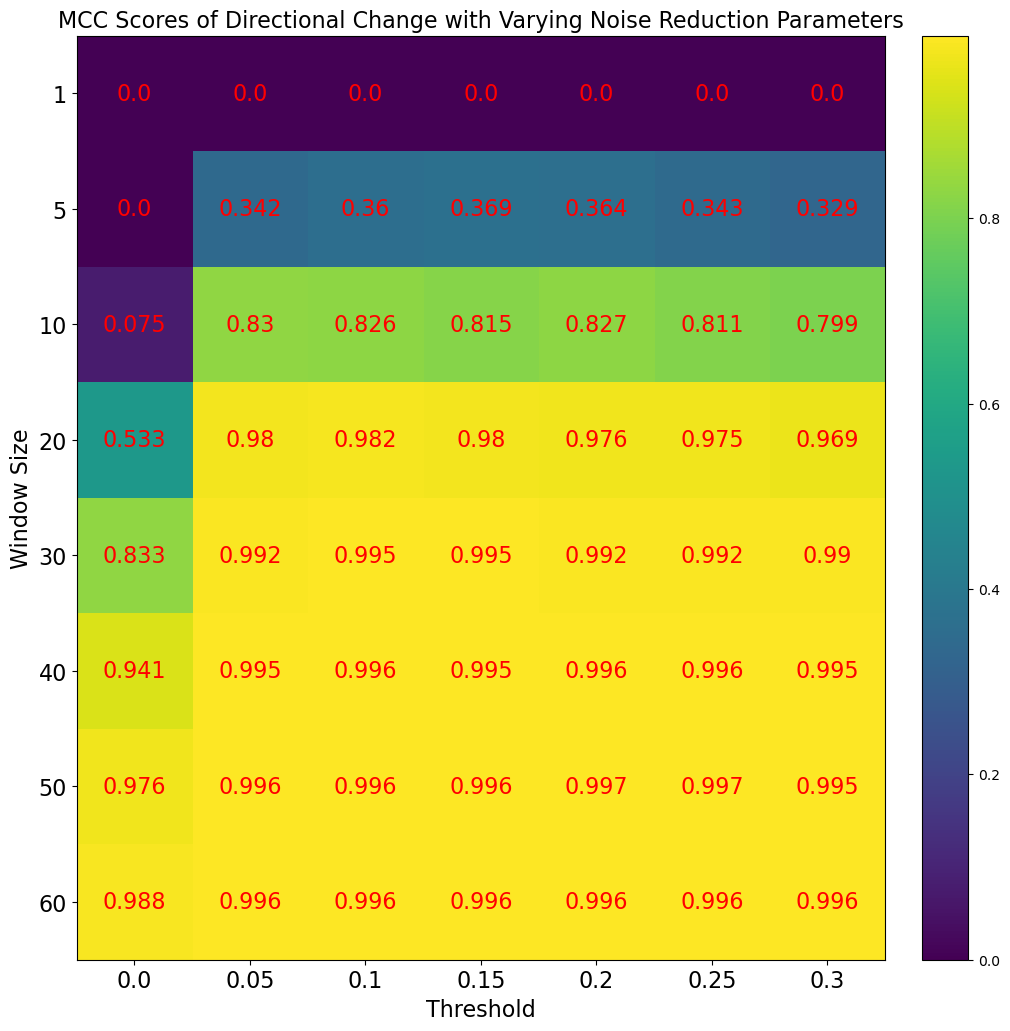

In [74]:
nr_matrix = [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
             [0.0, 0.342, 0.36, 0.369, 0.364, 0.343, 0.329],
             [0.075, 0.83, 0.826, 0.815, 0.827, 0.811, 0.799],
             [0.533, 0.98, 0.982, 0.98, 0.976, 0.975, 0.969],
             [0.833, 0.992, 0.995, 0.995, 0.992, 0.992, 0.99],
             [0.941, 0.995, 0.996, 0.995, 0.996, 0.996, 0.995],
             [0.976, 0.996, 0.996, 0.996, 0.997, 0.997, 0.995],
             [0.988, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996]]

plt.imshow(nr_matrix)

for i in range(len(nr_matrix)):
    for j in range(len(nr_matrix[i])):
        plt.text(j, i, round(nr_matrix[i][j], 3), ha='center', va='center', color="red", size=16)

plt.xlabel("Threshold", size=16)
plt.ylabel("Window Size", size=16)
plt.title("MCC Scores of Directional Change with Varying Noise Reduction Parameters", size=16)

threshold_ticks = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
window_ticks = [1, 5, 10, 20, 30, 40, 50, 60]

plt.xticks(list(range(len(threshold_ticks))), threshold_ticks, size=16)
plt.yticks(list(range(len(window_ticks))), window_ticks, size=16)

plt.colorbar(fraction=0.05, pad=0.04)
plt.gcf().set_size_inches(12, 12)

plt.savefig(path.join(cd, "final_report_graphs", "noise_reduction.png"), dpi=300)

plt.show()

## Boba + Koi + Bandung

In [40]:
train_data = {}
test_data = {}
train_labels = {}
test_labels = {}

process = lambda x : mf.changes_in_changes(mf.vel(x), 10, 0.1)

for name in names_all:
    pro_data, pro_labels = mc.process_data(pose_data_all[name], labels_all[name], process)
    train_data[name], test_data_dict, train_labels[name], test_labels_dict = mc.prep_train_test_data(pro_data, pro_labels, names_all[name])

    test_data[name] = np.concatenate(list(test_data_dict.values()))
    test_labels[name] = np.concatenate(list(test_labels_dict.values()))


In [41]:
def merge_data(data, labels, names):
    data_merged = np.concatenate([data[name] for name in names])
    labels_merged = np.concatenate([labels[name] for name in names])
    return data_merged, labels_merged

In [42]:
results = {}

train_combos = ["koi", "boba", "bandung", ("koi", "boba"), ("bandung", "boba"), ("koi", "bandung"), ("koi", "boba", "bandung")]

clf = RandomForestClassifier(class_weight="balanced")

for train_combo in train_combos:
    results[train_combo] = {}

    if type(train_combo) is tuple:
        clf.fit(*merge_data(train_data, train_labels, train_combo))
    else:
        clf.fit(train_data[train_combo], train_labels[train_combo])

    for test_name in names_all:
        results[train_combo][test_name] = mc.test_classify(clf, test_data[test_name], test_labels[test_name])

/Users/Russell/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/Russell/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/Russell/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/Rus

In [43]:
mccs = []
train_only = ["koi", "boba", "bandung"]

for train_combo in results:
    row = []
    for test_name in train_only:
        row.append(results[train_combo][test_name]["mcc"])
    mccs.append(row)

accs = []
test_only_names = ["horlicks", "briyani", "tutukueh"]

for train_combo in results:
    row = []
    for test_name in test_only_names:
        row.append(results[train_combo][test_name]["accuracy"])
    accs.append(row)

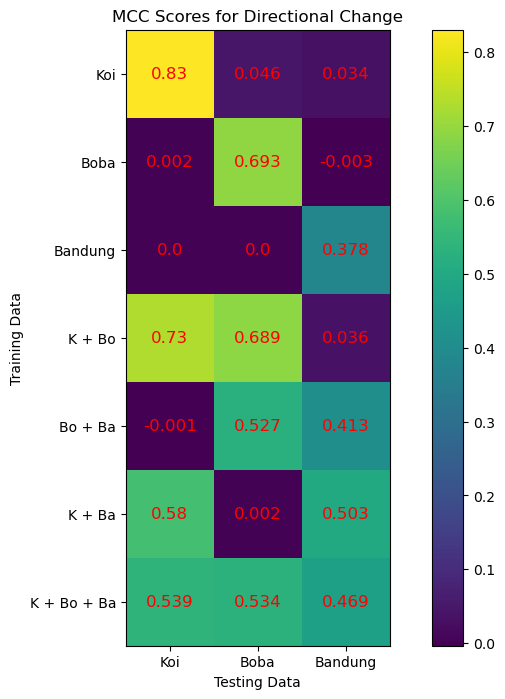

In [73]:
def str_process(name):
    if type(name) is tuple:
        first = True
        for n in name:
            if first:
                result = n.capitalize()
                first = False
            else:
                result += " + " + n.capitalize()
        return result
    return name.capitalize()

plt.imshow(mccs, cmap='viridis', interpolation='nearest')

for i in range(len(mccs)):
    for j in range(len(mccs[i])):
        plt.text(j, i, round(mccs[i][j], 3), ha='center', va='center', color="red", size=12)

plt.xlabel("Testing Data")
plt.ylabel("Training Data")
plt.title("MCC Scores for Directional Change")

y_labels = ["Koi", "Boba", "Bandung", "K + Bo", "Bo + Ba", "K + Ba", "K + Bo + Ba"]

plt.xticks(list(range(len(train_only))), [str_process(s) for s in train_only])
plt.yticks(list(range(len(train_combos))), y_labels)

plt.colorbar()
plt.gcf().set_size_inches(11, 8)

plt.savefig(path.join(cd, "final_report_graphs", "koi_boba_bandung.png"), dpi=300)
plt.show()

## THE ULTIMATE TREMOR DETECTOR

In [132]:
ultimate_detector = RandomForestClassifier(class_weight="balanced")
ultimate_training_data = ("koi", "boba")

train_data = {}
test_data = {}
train_labels = {}
test_labels = {}

process = lambda x : mf.changes_in_changes(mf.vel(x), 10, 0.1)

for name in names_all:
    pro_data, pro_labels = mc.process_data(pose_data_all[name], labels_all[name], process)
    train_data[name], test_data_dict, train_labels[name], test_labels_dict = mc.prep_train_test_data(pro_data, pro_labels, names_all[name])

    test_data[name] = np.concatenate(list(test_data_dict.values()))
    test_labels[name] = np.concatenate(list(test_labels_dict.values()))

ultimate_detector.fit(*merge_data(train_data, train_labels, ultimate_training_data))

RandomForestClassifier(class_weight='balanced')

In [133]:
ultimate_results = {}
ultimate_tremors = {}

for test_name in names_all:
    this_res = mc.test_classify(ultimate_detector, test_data[test_name], test_labels[test_name])
    ultimate_results[test_name] = this_res
    ultimate_tremors[test_name] = 100 * (np.count_nonzero(this_res["predictions"]) / len(this_res["predictions"]))

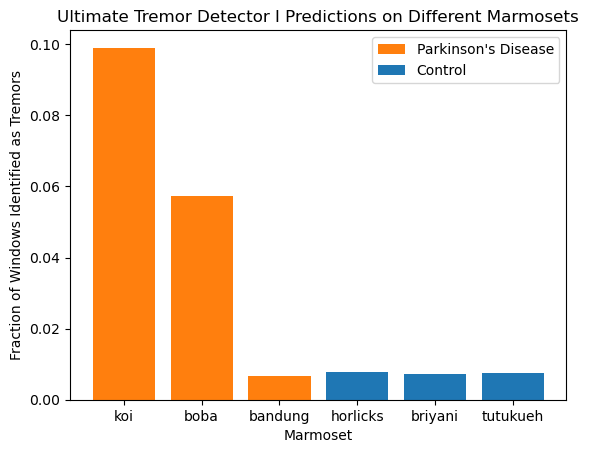

In [136]:
bar_heights = list(ultimate_tremors.values())
x_ticks = [key.capitalize() for key in ultimate_tremors.keys()]
plt.bar(x_ticks[:3], bar_heights[:3], color="tab:orange", label="Tremoring")
plt.bar(x_ticks[3:], bar_heights[3:], color="tab:blue", label="Non-Tremoring")
plt.xlabel("Marmoset")
plt.ylabel("Percentage of Windows Identified as Tremors (%)")
plt.title("Tremor Detection Rate of Directional Change on Unseen Video Data")
plt.legend()
plt.show()

## THE ULTIMATE 2 (Tested on Unseen Videos)

In [49]:
ultimate_detector2 = RandomForestClassifier(class_weight="balanced")
ultimate_training_data2 = ("koi", "boba")

train_data_u2 = {}
test_data_u2 = {}
train_labels_u2 = {}
test_labels_u2 = {}

process = lambda x : mf.changes_in_changes(mf.vel(x), 10, 0.1)

for name in names_all:
    if name == "koi" or name == "boba":
        continue

    pro_data, pro_labels = mc.process_data(pose_data_all[name], labels_all[name], process)
    train_data_u2[name], test_data_dict, train_labels_u2[name], test_labels_dict = mc.prep_train_test_data(pro_data, pro_labels, names_all[name])

    test_data_u2[name] = np.concatenate(list(test_data_dict.values()))
    test_labels_u2[name] = np.concatenate(list(test_labels_dict.values()))

pro_koi, pro_labels_koi = mc.process_data(pose_data_all["koi"], labels_all["koi"], process)
train_data_u2["koi"], _, train_labels_u2["koi"], _ = mc.prep_train_test_data(pro_koi, pro_labels_koi, ["koi_apr11", "koi_apr25", "koi_apr25_3", "koi_apr25_4", "koi_apr25_5", "koi_apr25_6"])

test_data_u2["koi"] = pro_koi["koi_apr17"]
test_labels_u2["koi"] = pro_labels_koi["koi_apr17"]

pro_boba, pro_labels_boba = mc.process_data(pose_data_all["boba"], labels_all["boba"], process)
train_data_u2["boba"], _, train_labels_u2["boba"], _ = mc.prep_train_test_data(pro_boba, pro_labels_boba, ["boba_apr11", "boba_apr21_2", "boba_apr25", "boba_apr25_2"])

test_data_u2["boba"] = pro_boba["boba_apr21"]
test_labels_u2["boba"] = pro_labels_boba["boba_apr21"]

ultimate_detector2.fit(*merge_data(train_data_u2, train_labels_u2, ultimate_training_data2))

RandomForestClassifier(class_weight='balanced')

In [50]:
ul2mate_results = {}
ul2mate_tremors = {}

for test_name in names_all:
    this_res = mc.test_classify(ultimate_detector2, test_data[test_name], test_labels[test_name])
    ul2mate_results[test_name] = this_res
    ul2mate_tremors[test_name] = np.count_nonzero(this_res["predictions"]) / len(this_res["predictions"])

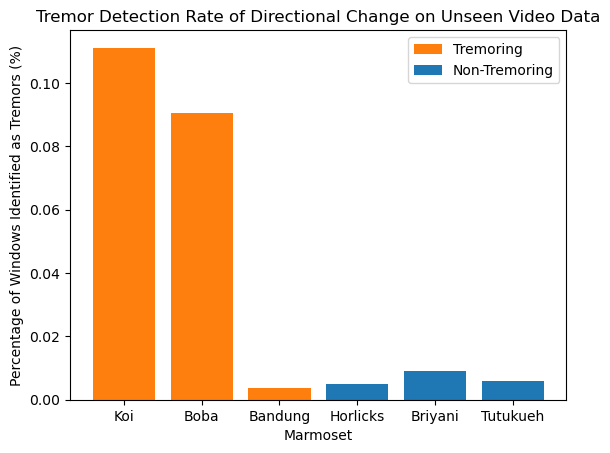

In [72]:
bar_heights = list(ul2mate_tremors.values())
x_ticks = [key.capitalize() for key in ul2mate_tremors.keys()]
plt.bar(x_ticks[:3], bar_heights[:3], color="tab:orange", label="Tremoring")
plt.bar(x_ticks[3:], bar_heights[3:], color="tab:blue", label="Non-Tremoring")
plt.xlabel("Marmoset")
plt.ylabel("Percentage of Windows Identified as Tremors (%)")
plt.title("Tremor Detection Rate of Directional Change on Unseen Video Data")
plt.legend()
plt.savefig(path.join(cd, "final_report_graphs", "tremor_detection_rate.png"), dpi=300)
plt.show()